# Human Trust & Uncertainty Metrics — Demo

This notebook demonstrates the `human_ai_trust` evaluation metric suite for human-centered AI evaluation.

Unlike traditional metrics that focus solely on predictive accuracy, these metrics surface:

- trust calibration  
- belief updating  
- uncertainty sensitivity  
- asymmetric harm from overconfident errors  
- explanation–confidence alignment  

The goal is to show how human–AI interaction quality can be evaluated computationally using theory-grounded metrics.

---

**Companion Dataset:**  
`dyra-12/human_ai_trust_demo`


In [3]:
import evaluate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [8]:
# Load demo dataset
from pathlib import Path

# Prefer the local copy shipped with this repo to avoid auth/network issues.
url = "https://huggingface.co/datasets/Dyra1204/human_ai_trust_demo/resolve/main/human_ai_trust_demo.csv"
local_path = Path("..") / "data" / "human_ai_trust_demo.csv"

df = pd.read_csv(local_path if local_path.exists() else url)

df.head()


,prediction,reference,confidence,human_trust,belief_prior,belief_posterior,explanation_length
0,0,0,0.462,0.389,0.462,0.462,111
1,1,1,0.746,0.768,0.695,0.721,57
2,0,0,0.759,0.764,0.572,0.665,63
3,0,0,0.990,0.925,0.368,0.679,64
4,0,0,0.721,0.936,0.396,0.559,99


In [10]:
from pathlib import Path

# The metric isn't on the Hub; load it from the local repo checkout.
try:
    metric = evaluate.load("human_ai_trust")
except FileNotFoundError:
    repo_root = Path.cwd()
    while not (repo_root / "metrics").exists() and repo_root != repo_root.parent:
        repo_root = repo_root.parent
    metric = evaluate.load(str(repo_root / "metrics" / "human_ai_trust"))

out = metric.compute(
    predictions=df["prediction"].tolist(),
    references=df["reference"].tolist(),
    confidences=df["confidence"].tolist(),
    human_trust_scores=df["human_trust"].tolist(),
    belief_priors=df["belief_prior"].tolist(),
    belief_posteriors=df["belief_posterior"].tolist(),
    explanation_complexity=df["explanation_length"].tolist(),
)

out


{'expected_trust_error': 0.07086666797598203,
 'trust_sensitivity_index': 0.8666191489611619,
 'belief_shift_magnitude': 0.16639166666666666,
 'overconfidence_penalty': 0.1472083330154419,
 'overconfidence_penalty_normalized': 0.20490186898320353,
 'explanation_confidence_alignment': -0.863066801839177}

## Metric Outputs

The metric suite produces the following values:

- **Expected Trust Error (ETE):**  
  Misalignment between human trust and model confidence.

- **Trust Sensitivity Index (TSI):**  
  Correlation between trust and confidence.

- **Belief Shift Magnitude (BSM):**  
  Degree of belief updating after AI exposure.

- **Overconfidence Penalty (OCP):**  
  Asymmetric harm from confident but wrong predictions.

- **Explanation–Confidence Alignment (ECA):**  
  Coupling between explanation complexity and model confidence.

These values surface human-centered failure modes that accuracy alone cannot detect.


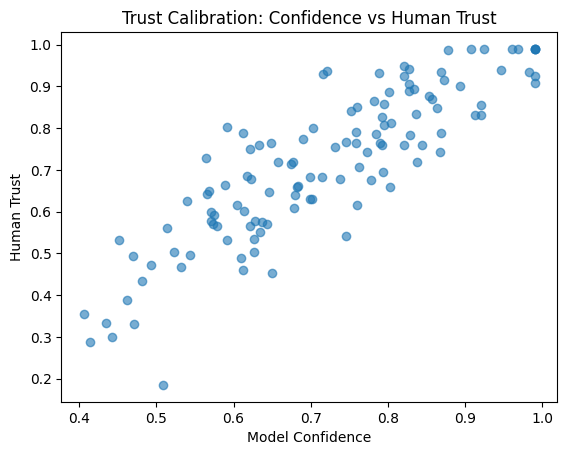

In [11]:
plt.figure()
plt.scatter(df["confidence"], df["human_trust"], alpha=0.6)
plt.xlabel("Model Confidence")
plt.ylabel("Human Trust")
plt.title("Trust Calibration: Confidence vs Human Trust")
plt.show()


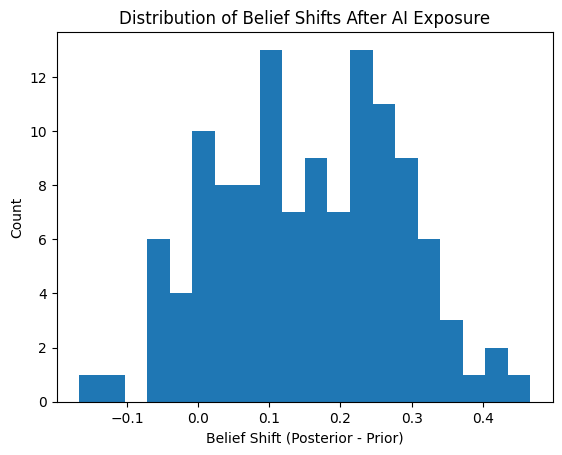

In [12]:
belief_shift = df["belief_posterior"] - df["belief_prior"]

plt.figure()
plt.hist(belief_shift, bins=20)
plt.xlabel("Belief Shift (Posterior - Prior)")
plt.ylabel("Count")
plt.title("Distribution of Belief Shifts After AI Exposure")
plt.show()


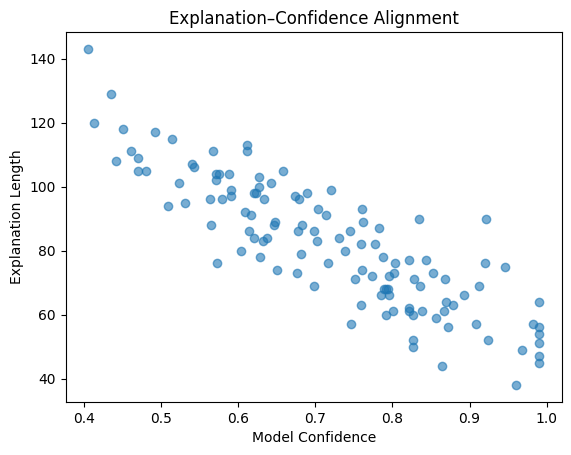

In [13]:
plt.figure()
plt.scatter(df["confidence"], df["explanation_length"], alpha=0.6)
plt.xlabel("Model Confidence")
plt.ylabel("Explanation Length")
plt.title("Explanation–Confidence Alignment")
plt.show()


## Why Accuracy Alone Is Insufficient

Accuracy treats all errors equally.

However, in human–AI interaction:

- A confident but wrong prediction is more damaging than a hesitant error  
- Users may over-trust highly confident systems  
- Users may ignore uncertainty signals  
- Beliefs may shift even when the model is wrong  

The metrics demonstrated here surface:

- misalignment between trust and uncertainty (ETE)  
- insensitivity to uncertainty (low TSI)  
- asymmetric harm from confident errors (OCP)  
- belief influence (BSM)  
- explanation–uncertainty coupling (ECA)  

These human-centered dimensions are invisible to accuracy alone.


## Cognitive Interpretation

This dataset demonstrates a psychologically plausible interaction pattern:

- Human trust tracks model confidence with noise  
- Beliefs partially update toward AI outputs  
- Explanations are longer when confidence is lower  

The resulting metrics show:

- Low ETE → trust is well calibrated  
- High TSI → users are uncertainty-sensitive  
- Moderate BSM → partial belief updating  
- Non-zero OCP → confident errors exist  
- Strong negative ECA → explanations hedge under uncertainty  

This illustrates how cognitive and social dimensions of human–AI interaction can be formalized into computational evaluation metrics.
